In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
date1 = date.today().strftime("%Y-%m-%d")
date2 = date.today() - timedelta(days=1095)
date2 = date2.strftime("%Y-%m-%d")
date2

'2020-09-19'

In [3]:
date1

'2023-09-19'

In [4]:
data = yf.download("SBIN.NS",start=date2, end=date1,progress=False)
data.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-18,598.799988,608.400024,597.049988,603.950012,603.950012,19305055


In [5]:
len(data)

744

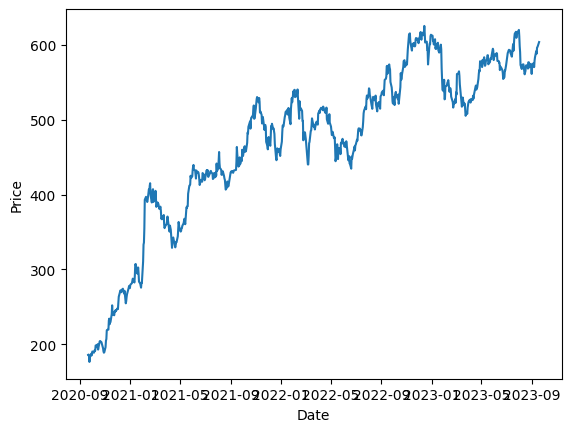

In [6]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(data["Close"])

In [7]:
df = data.copy()
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-12,593.650024,594.250000,584.650024,588.349976,588.349976,16093060
2023-09-13,588.400024,598.000000,583.450012,596.450012,596.450012,19377172
2023-09-14,598.450012,603.700012,595.200012,597.299988,597.299988,13178911
2023-09-15,599.349976,600.700012,595.200012,598.799988,598.799988,11756389
2023-09-18,598.799988,608.400024,597.049988,603.950012,603.950012,19305055


In [8]:
df.drop(["Open","High","Low","Adj Close","Volume"],axis=1,inplace=True)
df.tail(10)

,Close
Date,
2023-09-05,573.000000
2023-09-06,570.500000
2023-09-07,579.049988
2023-09-08,583.450012
2023-09-11,591.700012
2023-09-12,588.349976
2023-09-13,596.450012
2023-09-14,597.299988
2023-09-15,598.799988


In [9]:
df.reset_index(inplace=True)

In [10]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [11]:
df.drop(['Date'],axis=1,inplace=True)

In [12]:
df.tail()

,Close
739,588.349976
740,596.450012
741,597.299988
742,598.799988
743,603.950012


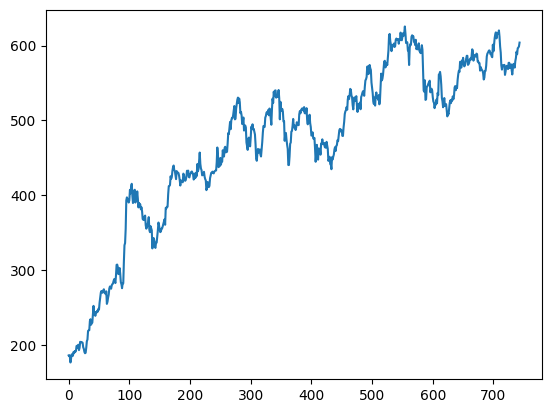

In [13]:
plt.plot(df['Close'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))
df1[1]

array([0.02193029])

In [20]:
training_size = 0.7*len(df1)
test_size = 0.3*len(df1)
training_size+test_size==len(df1)

True

In [21]:
len(df1)

744

In [22]:
training_size+test_size

744.0

In [28]:
train_size=round(training_size)
test_size=round(test_size)
train_size,test_size

(521, 223)

In [29]:
df1.shape

(744, 1)

In [30]:
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]
train_data

array([[0.02103974],
       [0.02193029],
       [0.01658688],
       [0.        ],
       [0.01302458],
       [0.02426805],
       [0.01936991],
       [0.02014914],
       [0.03105866],
       [0.02760769],
       [0.03395302],
       [0.03194922],
       [0.03373037],
       [0.04887008],
       [0.04976064],
       [0.04308136],
       [0.05276633],
       [0.03673606],
       [0.04363796],
       [0.06156071],
       [0.05944561],
       [0.06100411],
       [0.06000222],
       [0.05888901],
       [0.04530778],
       [0.0407436 ],
       [0.03139261],
       [0.02749636],
       [0.0287209 ],
       [0.04386062],
       [0.06323053],
       [0.06824   ],
       [0.09417787],
       [0.09540241],
       [0.09607034],
       [0.12323275],
       [0.12879882],
       [0.11232327],
       [0.11822329],
       [0.11866857],
       [0.14215739],
       [0.16842924],
       [0.1411555 ],
       [0.14783479],
       [0.13881775],
       [0.15028387],
       [0.14839139],
       [0.153

In [31]:
test_data

array([[0.89791834],
       [0.87810308],
       [0.88489366],
       [0.89179567],
       [0.88500495],
       [0.90960709],
       [0.92975623],
       [0.9747301 ],
       [0.97784702],
       [0.95602805],
       [0.94612042],
       [0.92663918],
       [0.9451185 ],
       [0.94266949],
       [0.94111096],
       [0.94923748],
       [0.93899583],
       [0.94122225],
       [0.96025832],
       [0.96404314],
       [0.95970171],
       [0.96237332],
       [0.96226202],
       [0.94868087],
       [0.9612601 ],
       [0.9600356 ],
       [0.98174327],
       [0.96315265],
       [0.95892238],
       [0.96916403],
       [0.97996215],
       [0.97228095],
       [0.98051876],
       [1.        ],
       [0.97873764],
       [0.95068457],
       [0.95313372],
       [0.95313372],
       [0.92853172],
       [0.92853172],
       [0.88533897],
       [0.9367694 ],
       [0.94745636],
       [0.94556381],
       [0.96949791],
       [0.97372818],
       [0.97038854],
       [0.970

In [35]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0] #i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [36]:
time_steps=100
X_train, y_train = create_dataset(train_data,time_steps)
X_test, y_test = create_dataset(test_data,time_steps)

In [37]:
X_train

array([[0.02103974, 0.02193029, 0.01658688, ..., 0.4863631 , 0.48068573,
        0.47601022],
       [0.02193029, 0.01658688, 0.        , ..., 0.48068573, 0.47601022,
        0.4826895 ],
       [0.01658688, 0.        , 0.01302458, ..., 0.47601022, 0.4826895 ,
        0.51341425],
       ...,
       [0.65145277, 0.66403207, 0.64956029, ..., 0.81776694, 0.85962376,
        0.83947462],
       [0.66403207, 0.64956029, 0.65000553, ..., 0.85962376, 0.83947462,
        0.84392747],
       [0.64956029, 0.65000553, 0.65345654, ..., 0.83947462, 0.84392747,
        0.85606139]])

In [41]:
X_train.shape

(420, 100)

In [39]:
X_test.shape

(122, 100)

In [42]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
#create lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 12s 655ms/step - loss: 0.1958 - val_loss: 0.0540
Epoch 2/100
7/7 [==============================] - 2s 262ms/step - loss: 0.0300 - val_loss: 0.0539
Epoch 3/100
7/7 [==============================] - 2s 280ms/step - loss: 0.0194 - val_loss: 0.0204
Epoch 4/100
7/7 [==============================] - 2s 244ms/step - loss: 0.0067 - val_loss: 0.0017
Epoch 5/100
7/7 [==============================] - 2s 280ms/step - loss: 0.0059 - val_loss: 0.0235
Epoch 6/100
7/7 [==============================] - 2s 233ms/step - loss: 0.0056 - val_loss: 0.0101
Epoch 7/100
7/7 [==============================] - 2s 231ms/step - loss: 0.0043 - val_loss: 0.0065
Epoch 8/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0039 - val_loss: 0.0126
Epoch 9/100
7/7 [==============================] - 2s 270ms/step - loss: 0.0037 - val_loss: 0.0068
Epoch 10/100
7/7 [==============================] - 2s 226ms/step - loss: 0.0036 - val_loss: 0.0077
Epoch 11

In [48]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 50ms/step


In [49]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

464.42801047607355

In [51]:
math.sqrt(mean_squared_error(y_test,test_predict))

566.9366176897395

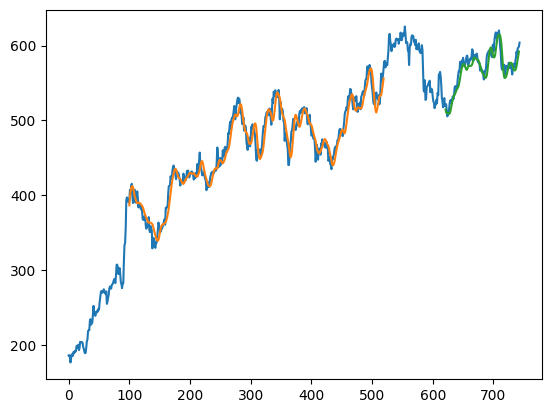

In [56]:
look_back = 100
#shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
# shift test predictions for plotting
testPredictionPlot = np.empty_like(df1)
testPredictionPlot[:,:] = np.nan
testPredictionPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictionPlot)
plt.show()

In [57]:
len(test_data)

223

In [59]:
x_input = test_data[123:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
x_input

array([[0.86474452, 0.89491258, 0.8882333 , 0.87754648, 0.89869754,
        0.89090504, 0.90671262, 0.88422576, 0.88133143, 0.88411446,
        0.8945787 , 0.90292781, 0.91272401, 0.91272401, 0.88578428,
        0.88789942, 0.89235227, 0.90225977, 0.90470892, 0.90148057,
        0.9120561 , 0.93209395, 0.92719579, 0.89836352, 0.90482021,
        0.91472785, 0.91472785, 0.91060887, 0.9191807 , 0.91762217,
        0.89580321, 0.89569192, 0.89068245, 0.89101634, 0.86864076,
        0.8792163 , 0.87387281, 0.8706446 , 0.86830675, 0.86073697,
        0.84214622, 0.84760099, 0.86775014, 0.86775014, 0.88277853,
        0.9108316 , 0.91929199, 0.92229762, 0.92652789, 0.9289769 ,
        0.92675047, 0.91773347, 0.91929199, 0.91127691, 0.90849387,
        0.94567511, 0.92619387, 0.94645444, 0.96560166, 0.9768451 ,
        0.9825226 , 0.96459974, 0.97695653, 0.98007344, 0.97896023,
        0.98819996, 0.96960921, 0.93977516, 0.92207503, 0.88378045,
        0.87175782, 0.88333513, 0.88478237, 0.88

In [61]:
temp_input = list(x_input)
temp_input[0]

array([0.86474452, 0.89491258, 0.8882333 , 0.87754648, 0.89869754,
       0.89090504, 0.90671262, 0.88422576, 0.88133143, 0.88411446,
       0.8945787 , 0.90292781, 0.91272401, 0.91272401, 0.88578428,
       0.88789942, 0.89235227, 0.90225977, 0.90470892, 0.90148057,
       0.9120561 , 0.93209395, 0.92719579, 0.89836352, 0.90482021,
       0.91472785, 0.91472785, 0.91060887, 0.9191807 , 0.91762217,
       0.89580321, 0.89569192, 0.89068245, 0.89101634, 0.86864076,
       0.8792163 , 0.87387281, 0.8706446 , 0.86830675, 0.86073697,
       0.84214622, 0.84760099, 0.86775014, 0.86775014, 0.88277853,
       0.9108316 , 0.91929199, 0.92229762, 0.92652789, 0.9289769 ,
       0.92675047, 0.91773347, 0.91929199, 0.91127691, 0.90849387,
       0.94567511, 0.92619387, 0.94645444, 0.96560166, 0.9768451 ,
       0.9825226 , 0.96459974, 0.97695653, 0.98007344, 0.97896023,
       0.98819996, 0.96960921, 0.93977516, 0.92207503, 0.88378045,
       0.87175782, 0.88333513, 0.88478237, 0.88455978, 0.88567

In [62]:
temp_input = temp_input[0].tolist()

In [63]:
temp_input

[0.8647445155838052,
 0.8949125841067931,
 0.8882333009257464,
 0.8775464750141446,
 0.8986975384207923,
 0.8909050413762378,
 0.9067126238819025,
 0.8842257581951913,
 0.8813314293281438,
 0.8841144639869132,
 0.8945787014819593,
 0.9029278054582677,
 0.9127240059229176,
 0.9127240059229176,
 0.8857842847821749,
 0.8878994183009126,
 0.8923522737549436,
 0.9022597684278715,
 0.9047089204618071,
 0.9014805730795619,
 0.9120561047828857,
 0.9320939543260256,
 0.9271957861485185,
 0.8983635199055944,
 0.9048202146700852,
 0.9147278452333771,
 0.9147278452333771,
 0.9106088724041799,
 0.9191807006874082,
 0.9176221741004245,
 0.8958032095537449,
 0.895691915345467,
 0.890682452959682,
 0.8910163355845158,
 0.8686407641060823,
 0.8792162958094063,
 0.8738728149084232,
 0.870644603416542,
 0.8683067455908844,
 0.8607369728532499,
 0.8421462197984515,
 0.8476009949077126,
 0.8677501386591304,
 0.8677501386591304,
 0.8827785258164855,
 0.9108315967111,
 0.9192919948956861,
 0.9222976179710116

In [66]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.89491258 0.8882333  0.87754648 0.89869754 0.89090504 0.90671262
 0.88422576 0.88133143 0.88411446 0.8945787  0.90292781 0.91272401
 0.91272401 0.88578428 0.88789942 0.89235227 0.90225977 0.90470892
 0.90148057 0.9120561  0.93209395 0.92719579 0.89836352 0.90482021
 0.91472785 0.91472785 0.91060887 0.9191807  0.91762217 0.89580321
 0.89569192 0.89068245 0.89101634 0.86864076 0.8792163  0.87387281
 0.8706446  0.86830675 0.86073697 0.84214622 0.84760099 0.86775014
 0.86775014 0.88277853 0.9108316  0.91929199 0.92229762 0.92652789
 0.9289769  0.92675047 0.91773347 0.91929199 0.91127691 0.90849387
 0.94567511 0.92619387 0.94645444 0.96560166 0.9768451  0.9825226
 0.96459974 0.97695653 0.98007344 0.97896023 0.98819996 0.96960921
 0.93977516 0.92207503 0.88378045 0.87175782 0.88333513 0.88478237
 0.88455978 0.88567299 0.8559501  0.86608032 0.88122014 0.88300125
 0.88021822 0.87309362 0.89179567 0.89190696 0.87632197 0.88277853
 0.88723138 0.8706446  0.85717461 0.87543134 0.8887

In [67]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [68]:
len(df1)

744

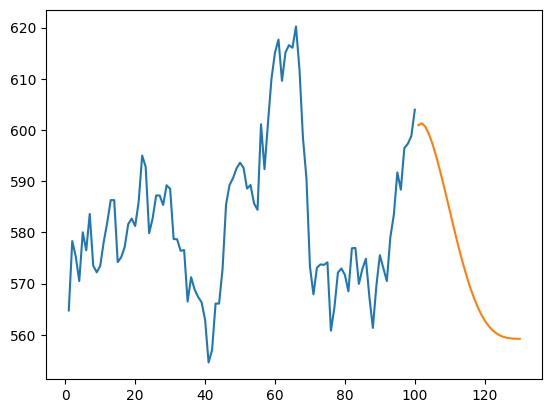

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[644:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

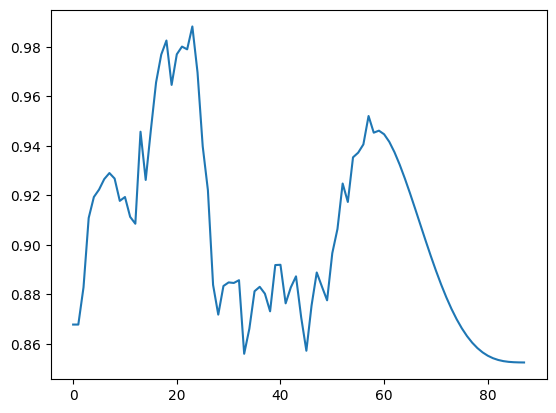

In [70]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[686:])

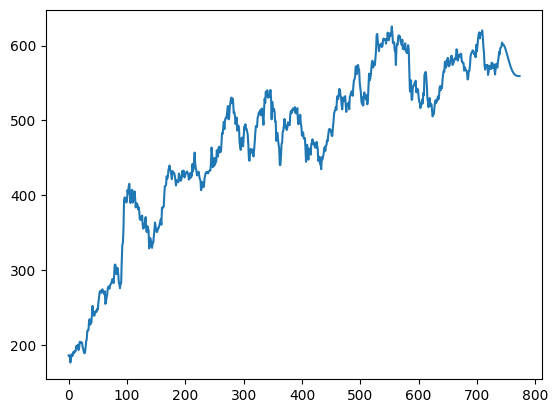

In [71]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [74]:
df3 = pd.DataFrame(df3)
df3.tail(30)

,0
744,600.927766
745,601.290653
746,600.639090
747,599.265823
748,597.382641
749,595.132449
750,592.615747
751,589.911646
752,587.090446
753,584.218354
